In [9]:
%matplotlib inline
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
import sys
sys.path.insert(0,'..')
from IPython.display import HTML
from helpers import show_hide
HTML(show_hide)

Last updated: 10/07/2015


color
======

Color representation
--------------------

(512, 512, 3)


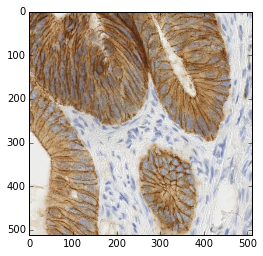

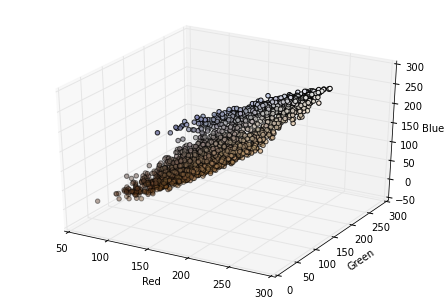

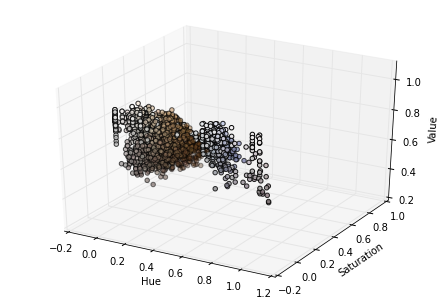

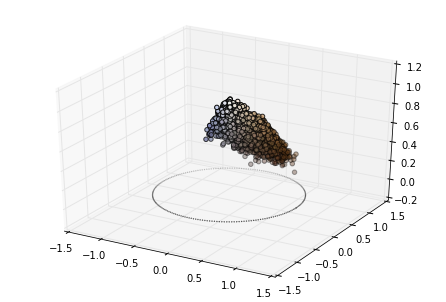

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from skimage import color
from skimage.data import lena,immunohistochemistry,imread

rgb = immunohistochemistry()

fig = plt.figure(0)
plt.imshow(rgb,origin='lower')
plt.gca().invert_yaxis()

#subsample
print(rgb.shape)
rgb = rgb[::10,::10,:]

r = rgb[:,:,0].flatten()
g = rgb[:,:,1].flatten()
b = rgb[:,:,2].flatten()

hsv = color.rgb2hsv(rgb)

xyz = color.rgb2xyz(rgb)

fig = plt.figure(1)
ax = Axes3D(fig)
col = np.vstack((r,g,b)).T/255.0
ax.scatter(r,g,b,c=col)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

fig = plt.figure(2)
ax = Axes3D(fig)
h = hsv[:,:,0].flatten()
s = hsv[:,:,1].flatten()
v = hsv[:,:,2].flatten()
ax.scatter(h,s,v,c=col)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')

fig = plt.figure(3)
ax = Axes3D(fig)
x = s*np.cos(h*2*np.pi)
y = s*np.sin(h*2*np.pi)
z = v
ax.scatter(x,y,z,c=col)

th = np.linspace(0,6.28,200)
ax.scatter(np.cos(th),np.sin(th),0,c='k',s=.1)
plt.show()